In [ ]:
# 检查并安装所需的依赖库
import sys
!{sys.executable} -m pip install nltk numpy pandas matplotlib scikit-learn seaborn -i https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
import nltk
from nltk.corpus import twitter_samples as ts
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [2]:
samples_tw = ts.strings('positive_tweets.json')

In [5]:
samples_tw[100]

"@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D"

In [6]:
from nltk.tokenize import word_tokenize as wtoken

wtoken(samples_tw[100])

['@',
 'metalgear_jp',
 '@',
 'Kojima_Hideo',
 'I',
 'want',
 'you',
 "'re",
 'T-shirts',
 '!',
 'They',
 'are',
 'so',
 'cool',
 '!',
 ':',
 'D']

In [7]:
from nltk.tokenize import wordpunct_tokenize 

wordpunct_tokenize(samples_tw[100])

['@',
 'metalgear_jp',
 '@',
 'Kojima_Hideo',
 'I',
 'want',
 'you',
 "'",
 're',
 'T',
 '-',
 'shirts',
 '!',
 'They',
 'are',
 'so',
 'cool',
 '!',
 ':',
 'D']

In [8]:
from nltk import regexp_tokenize

patn = r'\w+'
regexp_tokenize(samples_tw[100], patn)

['metalgear_jp',
 'Kojima_Hideo',
 'I',
 'want',
 'you',
 're',
 'T',
 'shirts',
 'They',
 'are',
 'so',
 'cool',
 'D']

In [9]:
patn = r'\w+|[!,\-,]'
regexp_tokenize(samples_tw[100], patn)

['metalgear_jp',
 'Kojima_Hideo',
 'I',
 'want',
 'you',
 're',
 'T',
 '-',
 'shirts',
 '!',
 'They',
 'are',
 'so',
 'cool',
 '!',
 'D']

## 词干提取
利用Porter词干提取器

In [10]:
import nltk
from nltk.stem import PorterStemmer

stemming = PorterStemmer()
stemming.stem("enjoying")

'enjoy'

In [11]:
stemming.stem("enjoys")

'enjoy'

In [12]:
stemming.stem("organization")

'organ'

In [13]:
stemming.stem("congratulations")

'congratul'

## 去掉停用词

In [14]:
from nltk.corpus import stopwords

sw_1 = stopwords.words('english')
# sw_1[20: 40]
# sw_1[0: 20]
# sw_1[20: 40]
sw_1[40: 60]

["don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd"]

In [15]:
example_text = "This is an example sentence to test stopwords tool."
example_text_without_stopwords = [word for word in example_text.split() if word not in sw_1]

In [16]:
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords', 'tool.']

## 探索分析

In [17]:
from nltk.corpus import webtext
webtext_sentences = webtext.sents('firefox.txt')
webtext_words = webtext.words('firefox.txt')

In [18]:
len(webtext_sentences)

1144

In [19]:
len(webtext_words)

102457

In [20]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

In [21]:
frequency_dist = nltk.FreqDist(webtext_words)

In [22]:
sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[0: 30]

['.',
 'in',
 'to',
 '"',
 'the',
 "'",
 'not',
 '-',
 'when',
 'on',
 'a',
 'is',
 't',
 'and',
 'of',
 '(',
 'page',
 'for',
 'with',
 ')',
 'window',
 'Firefox',
 'does',
 'from',
 'open',
 ':',
 'menu',
 'should',
 'bar',
 'tab']

<Axes: xlabel='Samples', ylabel='Counts'>

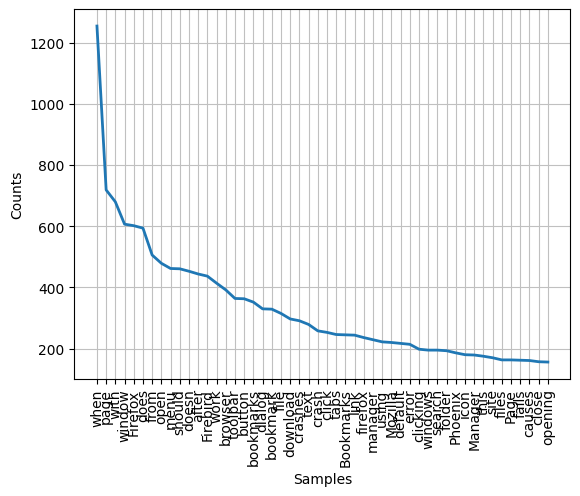

In [23]:
large_words = dict([(k, v) for k, v in frequency_dist.items() if len(k) > 3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50, cumulative=False)

In [24]:
!{sys.executable} -m pip install wordcloud

'{sys.executable}' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [25]:
from wordcloud import WordCloud

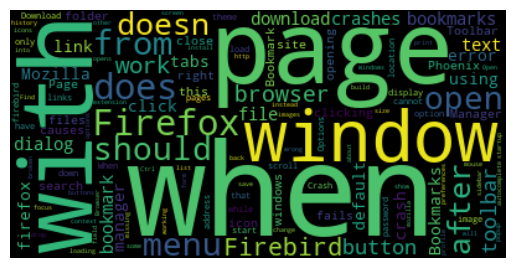

In [26]:
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

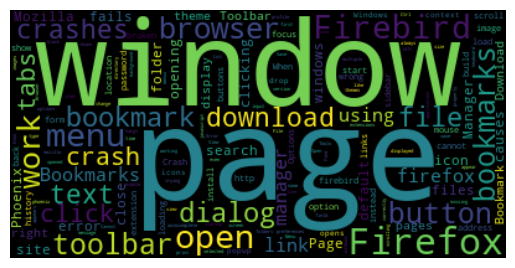

In [27]:
words_without_stopwords = [word for word in webtext_words if word not in sw_1 and len(word) > 3]
frequency_dist_without_stopwords = nltk.FreqDist(words_without_stopwords)
wcloud_without_stopwords = WordCloud().generate_from_frequencies(frequency_dist_without_stopwords)
plt.imshow(wcloud_without_stopwords, interpolation='bilinear')
plt.axis("off")
plt.show()

## 词性标注

In [28]:
from nltk.corpus import brown
brown.tagged_words()[30: 50]

[('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD'),
 ('over-all', 'JJ'),
 ('charge', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('election', 'NN'),
 (',', ','),
 ('``', '``'),
 ('deserves', 'VBZ'),
 ('the', 'AT'),
 ('praise', 'NN')]

使用带**有词性标注的NLTK treebank数据集作为训练数据或标注数据**，利用**sklearn随机森林学习模型**训练词性标注器。

In [29]:
import nltk
import numpy as np
from nltk import word_tokenize # used to tokenize sentences

import matplotlib.pyplot as plt # used to plot graphs
%matplotlib inline

from sklearn.feature_extraction import DictVectorizer # used to convert features into vectors
from sklearn.model_selection import train_test_split # used to split data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # used to train a random forest classifier
from sklearn.metrics import accuracy_score # used to calculate accuracy
from sklearn.metrics import confusion_matrix # used to plot confusion matrix

In [30]:
def sentence_features(st, ix):
    """extract features from a sentence(artificial)

    Args:
        st (list): sentence
        ix (int): index 
    """
    d_ft = {} # feature dictionary
    d_ft['word'] = st[ix] # word
    d_ft['dist_from_first'] = ix - 0 # distance from first word
    d_ft['dist_from_last'] = len(st) - ix - 1 # distance from last word
    d_ft['capitalized'] = st[ix][0].upper() == st[ix][0] # capitalized or not
    d_ft['prefix1'] = st[ix][0] # first letter
    d_ft['prefix2'] = st[ix][:2] # first two letters
    d_ft['prefix3'] = st[ix][:3] # first three letters
    d_ft['suffix1'] = st[ix][-1] # last letter
    d_ft['suffix2'] = st[ix][-2:] # last two letters
    d_ft['suffix3'] = st[ix][-3:] # last three letters
    d_ft['prev_word'] = '' if ix==0 else st[ix-1] # previous word (if exists) or empty string (if not exists)
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1] # next word(if exists) or empty string (if not exists)
    d_ft['numeric'] = st[ix].isdigit() # numeric or not
    return d_ft # return feature dictionary



In [31]:
def get_untagged_sentence(tagged_sentence):
    """transfer tagged sentence to untagged sentence

    Args:
        tagged_sentence (list): # tagged sentence list
    
    Returns:
        list: # untagged sentence list
    """
    [s,t] = zip(*tagged_sentence) # desturcture tagged sentences into untagged sentences
    return list(s)


In [32]:
tagged_sentences = nltk.corpus.treebank.tagged_sents(tagset='universal') # tagged sentences with universal tagset

In [33]:
def ext_ft(tg_sent):
    """extract features from tagged sentence

    Args:
        tg_sent (list): tagged sentence

    Returns:
        sent(list): list of features
        tag (list): list of tags
    """
    sent, tag = [], []

    for tg in tg_sent:
        for index in range(len(tg)):
            sent.append(sentence_features(get_untagged_sentence(tg), index)) # get features
            tag.append(tg[index][1]) # get tags
        
    return sent, tag

In [34]:
X, y = ext_ft(tagged_sentences) # X is a list of features, y is a list of tags

In [35]:
n_sample = 50000 # number of samples to use
dict_vectorizer = DictVectorizer(sparse=False) # create a dictionary vectorizer
X_transformed = dict_vectorizer.fit_transform(X[0:n_sample]) # transform the first n_sample data into a sparse matrix
y_sampled = y[0:n_sample] # get the labels for the first n_sample data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123) # randomly split the vectorized data into training and test sets
# 80% of the data is used for training, 20% for testing

In [39]:
rf = RandomForestClassifier(n_jobs=4) # create a random forest classifier with 4 jobs
rf.fit(X_train, y_train) # train the classifier

RandomForestClassifier(n_jobs=4)

In [41]:
def predict_pos_tags(sentence):
    """
    Predict the part of speech tags for a sentence.

    Args:
        sentence (list): a list of words in the sentence.

    Raises:
        ValueError: If the input sentence is not a list of words.

    Example:
        >>> predict_pos_tags(['I', 'like', 'to', 'eat', 'pizza'])
        [('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('pizza', 'NN')]

    Note: TODO: Add more examples and notes here.

    Returns:
        zip(sentence, tags): A zip object containing the original sentence and the predicted part of speech tags.
    """
    tagged_sentence = [] # Initialize an empty list to store the tagged sentence
    features = [sentence_features(sentence, index) for index in range(len(sentence))] # 
    features = dict_vectorizer.transform(features)
    tags = rf.predict(features)
    return zip(sentence, tags)
    

In [43]:
test_sentence = "This is a simple POS tagger"
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('This', np.str_('DET'))
('is', np.str_('VERB'))
('a', np.str_('DET'))
('simple', np.str_('ADJ'))
('POS', np.str_('NOUN'))
('tagger', np.str_('NOUN'))


In [44]:
predictions = rf.predict(X_test)
accuracy_score(y_test, predictions)

0.9513

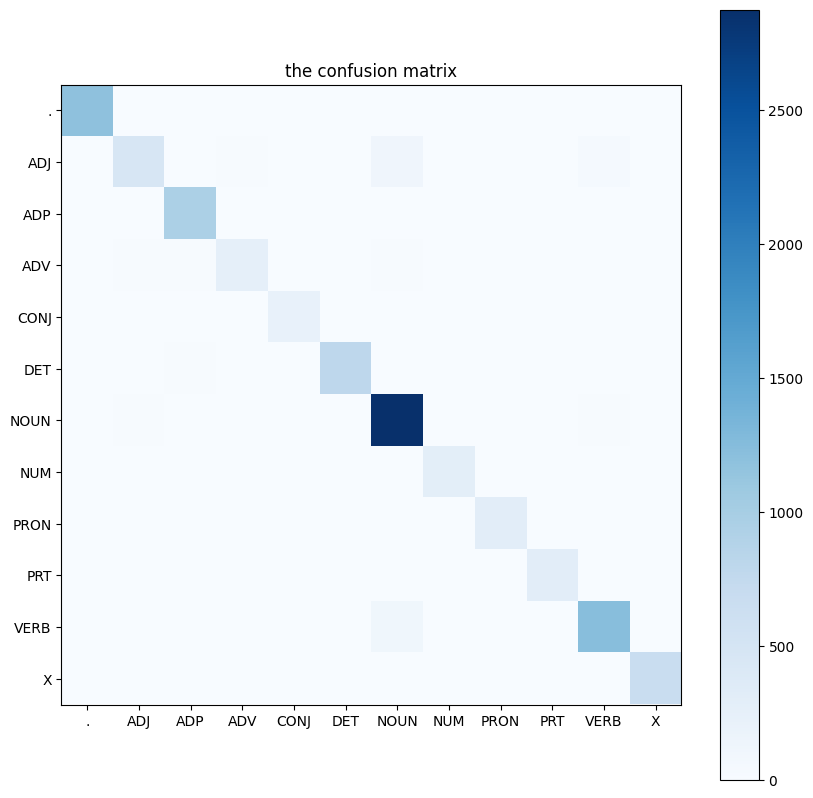

In [46]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 10))
plt.xticks(np.arange(len(rf.classes_)), rf.classes_)
plt.yticks(np.arange(len(rf.classes_)), rf.classes_)
plt.title("the confusion matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()